## Mini Project III

1. Based on demographics (only on the information from twm_customer)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.decomposition import PCA


# Data Wrangling

In [4]:
# Read the customer data
df_customers = pd.read_csv('twm_customer.csv', sep=';')
df_customers.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [6]:
# Check for missing or null values
df_customers.isnull().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [7]:
# Check for any inconsistencies or errors in the data
df_customers['gender'].unique()

array(['M ', 'F '], dtype=object)

In [8]:
df_customers['marital_status'].unique()

array([2, 1, 4, 3])

In [9]:
# Convert categorical data to numerical values
df_customers['gender'] = df_customers['gender'].str.strip()
df_customers['gender'].replace({'M':1,'F':2},inplace=True)
df_customers.head()


,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,1,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,1,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,2,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,2,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,2,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [12]:
# Create a new dataframe with only the relevant columns
customers = df_customers[['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender', 'marital_status']]

customers.head(10)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status
0,1362691,26150,46,5,1,1,2
1,1362487,6605,71,1,0,1,2
2,1363160,18548,38,8,0,2,1
3,1362752,47668,54,3,0,2,1
4,1362548,44554,59,9,2,2,4
5,1362813,15684,53,3,2,2,2
6,1363017,0,16,1,0,1,1
7,1362609,1929,79,8,0,2,2
8,1363486,39942,41,1,5,2,4
9,1363078,9622,46,6,1,1,2


In [13]:
customers.describe()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.559572,1.882195
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.496771,0.892051
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,1.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,1.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,2.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,2.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,2.000000,4.000000


# Data Visualization

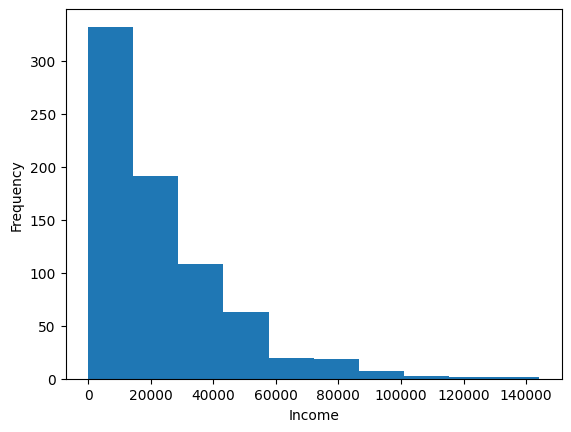

In [14]:
# Create a histogram of the income column
plt.hist(customers['income'])
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

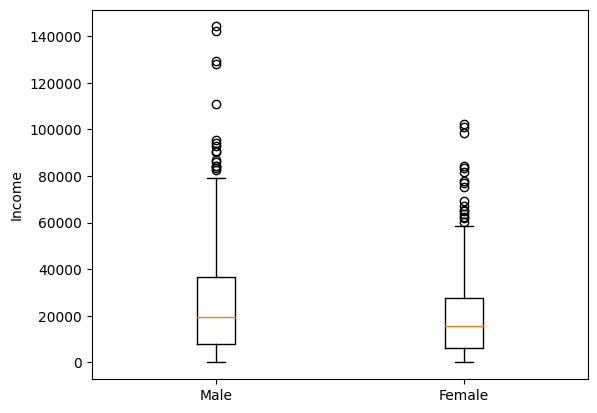

In [15]:
# Create a box plot of income for each gender
data = [customers[customers['gender'] == 1]['income'], customers[customers['gender'] == 2]['income']]
plt.boxplot(data, labels=['Male', 'Female'])
plt.ylabel('Income')
plt.show()

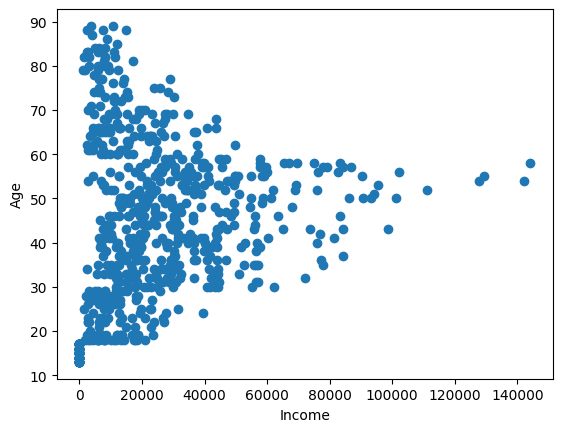

In [16]:
# Create a scatterplot of income vs age
plt.scatter(customers['income'], customers['age'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

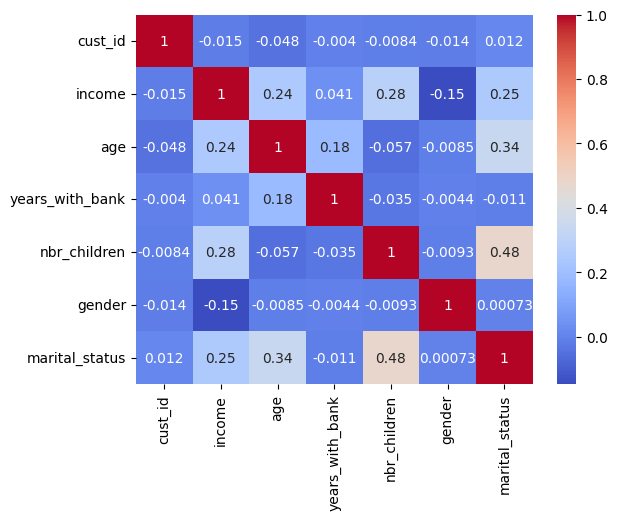

In [17]:
# Create a correlation matrix of the numeric columns in the dataframe
corr_matrix = customers.select_dtypes(include=['float64', 'int64']).corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [19]:
customers = customers.drop("cust_id", axis=1)

In [20]:
customers.describe()

,income,age,years_with_bank,nbr_children,gender,marital_status
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,22728.281124,42.479250,3.907631,0.714859,1.559572,1.882195
std,22207.221405,19.114879,2.675634,1.103410,0.496771,0.892051
min,0.000000,13.000000,0.000000,0.000000,1.000000,1.000000
25%,7118.500000,28.000000,2.000000,0.000000,1.000000,1.000000
50%,17242.000000,42.000000,4.000000,0.000000,2.000000,2.000000
75%,31338.000000,56.000000,6.000000,1.000000,2.000000,2.000000
max,144157.000000,89.000000,9.000000,5.000000,2.000000,4.000000


# Data Preparation and Feature Engineering

In [23]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the entire DataFrame and transform the data
cs_scaled = pd.DataFrame(scaler.fit_transform(customers), columns=customers.columns)

# Display the original and scaled data
cs_scaled.head(15)

,income,age,years_with_bank,nbr_children,gender,marital_status
0,0.154185,0.184312,0.408539,0.258591,-1.127172,0.132149
1,-0.726524,1.493070,-1.087435,-0.648298,-1.127172,0.132149
2,-0.188366,-0.234490,1.530520,-0.648298,0.887176,-0.989614
3,1.123798,0.603115,-0.339448,-0.648298,0.887176,-0.989614
4,0.983479,0.864867,1.904514,1.165479,0.887176,2.375675
5,-0.317419,0.550765,-0.339448,1.165479,0.887176,0.132149
6,-1.024149,-1.386197,-1.087435,-0.648298,-1.127172,-0.989614
7,-0.937227,1.911873,1.530520,-0.648298,0.887176,0.132149
8,0.775660,-0.077439,-1.087435,3.886146,0.887176,2.375675
9,-0.590576,0.184312,0.782533,0.258591,-1.127172,0.132149


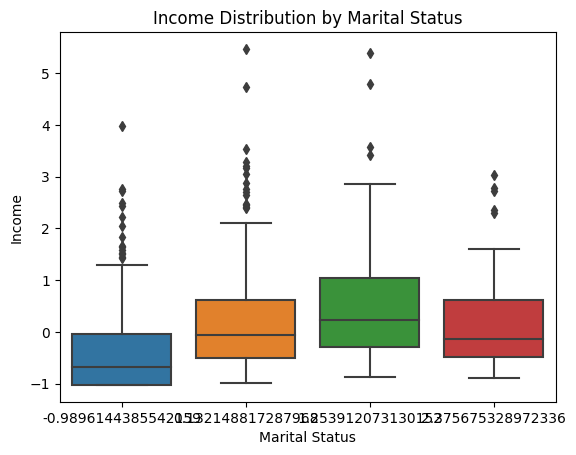

In [28]:
# Create a box plot of income for each gender
# Create a box plot for 'marital_status' and 'income'
sns.boxplot(x='marital_status', y='income', data=cs_scaled)

# Set the plot title and labels
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')

# Display the plot
plt.show()

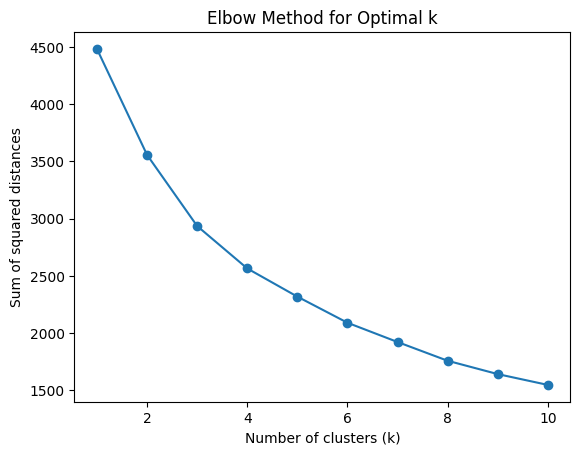

In [30]:
# Calculate the sum of squared distances for different numbers of clusters
sum_of_squared_distances = []
K = range(1, 11)  # Test cluster numbers from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(cs_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, sum_of_squared_distances, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

## So we can choose the numer of clusters = 3 

In [50]:
# Fit KMeans algorithm with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(cs_scaled)
k_labels = kmeans.labels_

# Get the cluster labels and assign them to a new column in the original dataframe
customers["cluster"] = kmeans.labels_

In [51]:
customers.head(10)

,income,age,years_with_bank,nbr_children,gender,marital_status,cluster
0,26150,46,5,1,1,2,0
1,6605,71,1,0,1,2,0
2,18548,38,8,0,2,1,2
3,47668,54,3,0,2,1,2
4,44554,59,9,2,2,4,2
5,15684,53,3,2,2,2,2
6,0,16,1,0,1,1,1
7,1929,79,8,0,2,2,2
8,39942,41,1,5,2,4,2
9,9622,46,6,1,1,2,0


# Dimensionality Reduction 

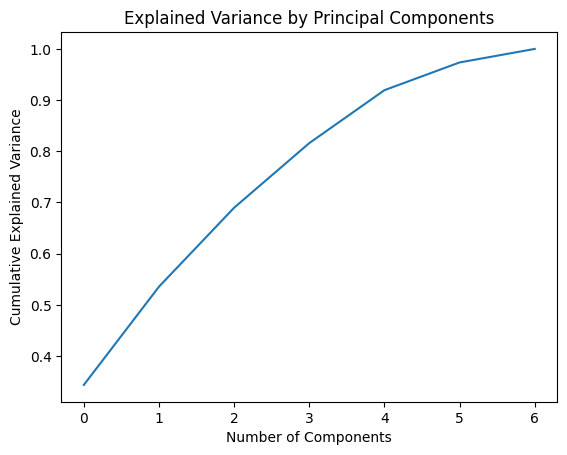

In [52]:
# Initialize PCA and fit to the data
pca = PCA()
pca.fit(cs_scaled)
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance as a function of the number of components
plt.plot(cum_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

## So we choose the number of Components = 4 to get the appox 90% explained variance

# Unsupervised Learning


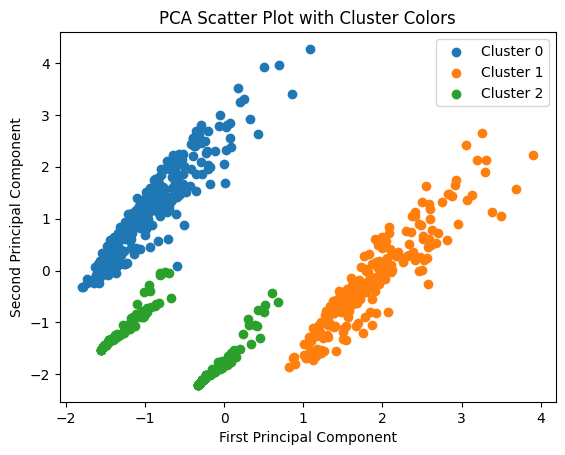

In [56]:
# Scale your data
scaler = StandardScaler()
cs_scaled = scaler.fit_transform(customers)

# Initialize PCA with 4 components and transform the data
pca = PCA(n_components=4)
pca_transformed = pca.fit_transform(cs_scaled)

# Perform k-means clustering on the PCA-transformed data (assume k=3)
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=50)
kmeans.fit(pca_transformed)
cluster_labels = kmeans.labels_

# Create a scatter plot of the first two principal components, colored by cluster labels
for i in range(k):
    plt.scatter(
        pca_transformed[cluster_labels == i, 0],
        pca_transformed[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot with Cluster Colors')
plt.legend()
plt.show()

# Radar charts

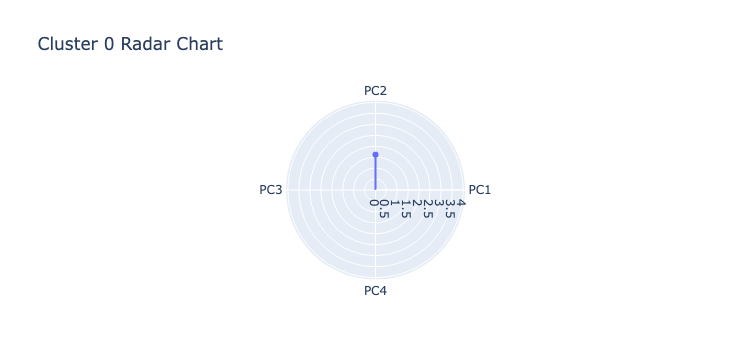

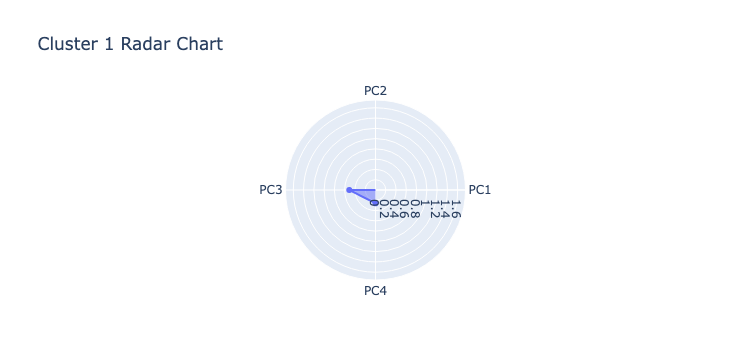

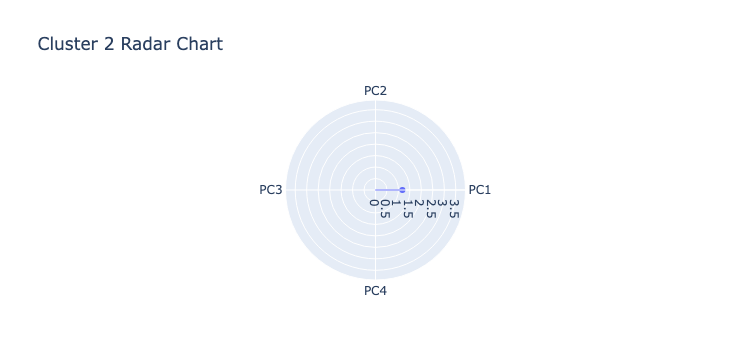

In [57]:
import plotly.graph_objects as go

# Define a function to create a radar chart for a given cluster
def create_radar_chart(cluster_id):
    # Extract the data for the specified cluster
    cluster_data = pca_features[k_labels == cluster_id, :]
    cluster_data_mean = cluster_data.mean(axis=0)
    
    # Create a list of the feature names
    feature_names = ['PC1', 'PC2', 'PC3', 'PC4']
    
    # Create a radar chart for the cluster mean
    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(
        r=cluster_data_mean,
        theta=feature_names,
        fill='toself',
        name=f'Cluster {cluster_id}'
    ))
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, cluster_data.max()]
            )
        ),
        title=f'Cluster {cluster_id} Radar Chart'
    )
    return fig

# Create radar charts for each cluster
fig_cluster0 = create_radar_chart(0)
fig_cluster1 = create_radar_chart(1)
fig_cluster2 = create_radar_chart(2)

# Display the radar charts
fig_cluster0.show()
fig_cluster1.show()
fig_cluster2.show()

# Visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations)

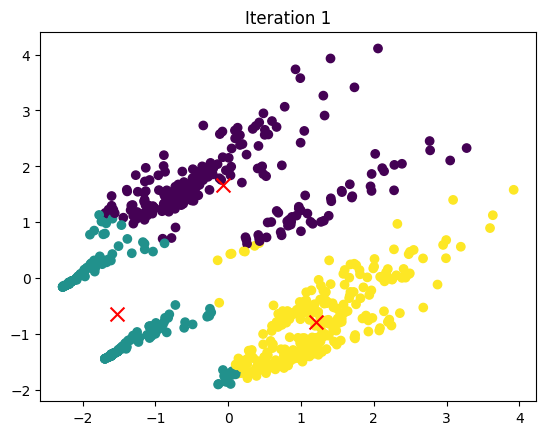

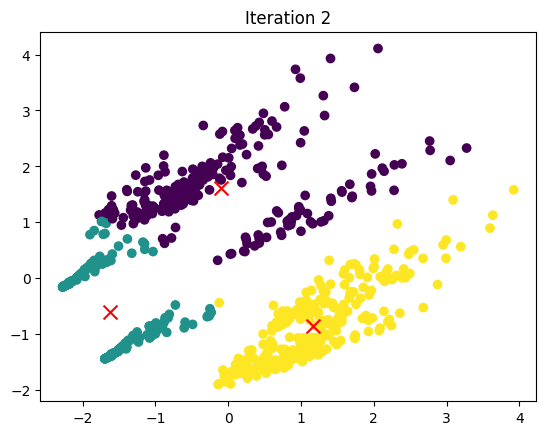

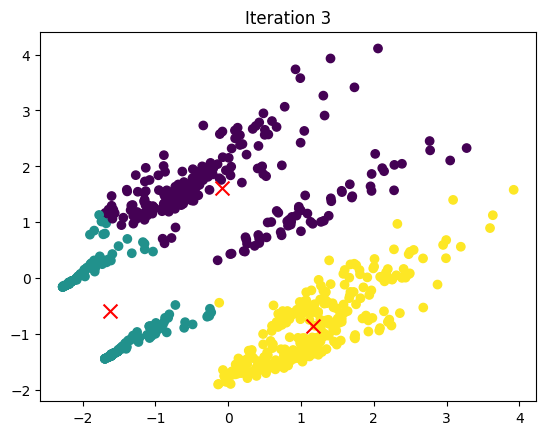

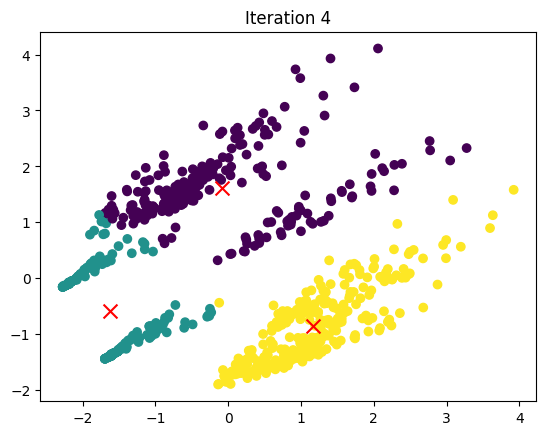

In [58]:
class MyKMeans:
    def __init__(self, n_clusters, n_init=10, max_iter=300):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.labels_ = None
        self.centroids_ = None

    def fit(self, X):
        # Initialize the centroids randomly
        n_samples, n_features = X.shape
        np.random.seed(0)
        centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False), :]

        # Iterate until convergence or max iterations is reached
        for i in range(self.max_iter):
            # Assign each point to the nearest centroid
            distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)

            # Update the centroids to the mean of the assigned points
            for j in range(self.n_clusters):
                centroids[j] = X[labels == j, :].mean(axis=0)

            # Plot the current cluster assignments
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100)
            plt.title(f'Iteration {i+1}')
            plt.show()

            # Check for convergence
            if self.labels_ is not None and np.all(labels == self.labels_):
                break
            self.labels_ = labels
            self.centroids_ = centroids

# Initialize and fit the custom KMeans object
my_kmeans = MyKMeans(n_clusters=3)
my_kmeans.fit(pca_features[:, :2])